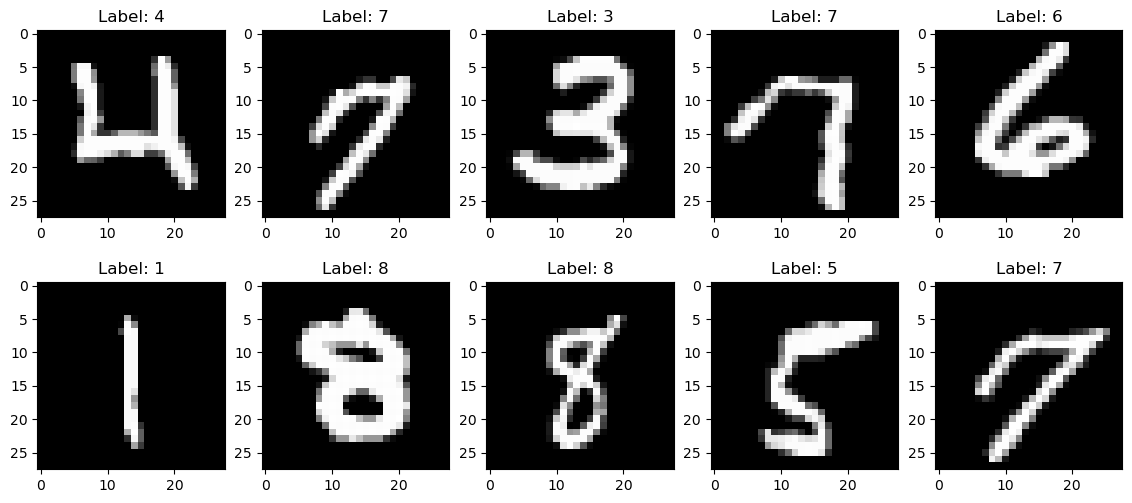

In [1]:
from scipy.io import loadmat
import random
import matplotlib.pyplot as plt


mnist = loadmat(r"C:\Users\sivar\Downloads\mnist-original.mat\mnist-original.mat")
images = mnist["data"].T
labels = mnist["label"][0] 


reshaped_images = images.reshape(-1,28, 28,)


random_indices = random.sample(range(len(images)), 10)

# Display 10 random images along with their true labels
plt.figure(figsize=(14, 6))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(reshaped_images[idx], cmap='gray')
    plt.title(f"Label: {int(labels[idx])}")  # Convert label to integer for display


plt.show()


In [ ]:
from scipy.io import loadmat
from PIL import Image
import numpy as np
import os

# Load the MNIST dataset
mnist = loadmat(r"C:\Users\sivar\Downloads\mnist-original.mat\mnist-original.mat")
images = mnist["data"].T
labels = mnist["label"][0]

# Define a function for image augmentation
def augment_images(images, labels, output_dir, rotations=[-10, 10], scales=[0.9, 1.1]):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for idx, image in enumerate(images):
        img = Image.fromarray(image.reshape(28, 28).astype('uint8'))

        # Save original image
        img.save(os.path.join(output_dir, f"{idx}_original.png"))

        # Apply rotation augmentation
        for angle in rotations:
            rotated_img = img.rotate(angle)
            rotated_img.save(os.path.join(output_dir, f"{idx}_rotated_{angle}.png"))

        # Apply scaling augmentation
        for scale in scales:
            scaled_img = img.resize((int(28 * scale), int(28 * scale)), Image.LANCZOS)
            scaled_img.save(os.path.join(output_dir, f"{idx}_scaled_{scale}.png"))

# Directory to save augmented images
output_directory = "augmented_images"

# Apply augmentation
augment_images(images, labels, output_directory)
